In [1]:
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt

In [2]:
import random
random.seed(1)
base_X = 25
base_Y = -100
ETx = 50*0.000000001
epsilon_amp = 10*0.000000000001
num_clusters = 5
num_nodes = 100
energy = 0.5
packet_bit = 2000

In [3]:
class Cluster:
    def __init__(self):
        nodes = []
        head = None
        
clusters = [Cluster() for i in range(num_clusters)]

In [4]:
def distance(x_1, x_2, y_1, y_2):
    return (x_1 - x_2)**2 + (y_1 - y_2)**2

In [5]:
class Node:
    def __init__(self, x, y):
        self.X = x
        self.Y = y
        self.energy = energy
        self.die = False
    
    def send(self):
        transmission = ETx * packet_bit
        amplification = epsilon_amp * packet_bit * distance(self.X, base_X, self.Y, base_Y)
        if self.energy < transmission + amplification:
            self.die = True
        else:
            self.energy -= (transmission + amplification)

In [6]:
Xs = uniform.rvs(loc=0, scale=50, size=num_nodes)
Ys = uniform.rvs(loc=0, scale=50, size=num_nodes)

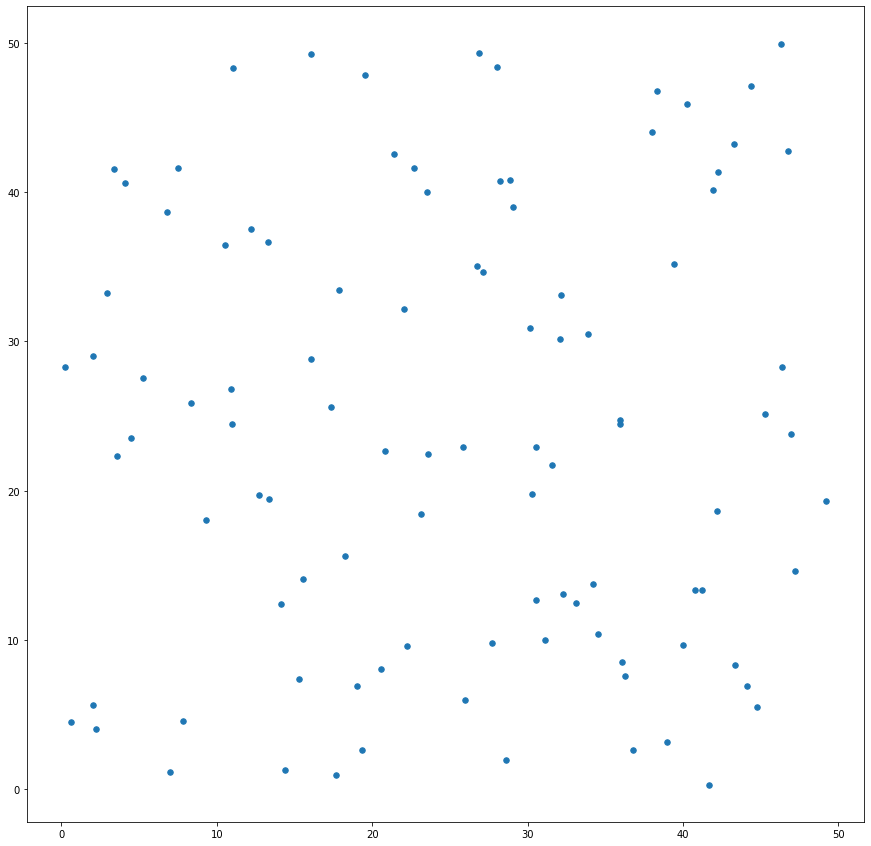

In [7]:
plt.figure(figsize=(15, 15))
plt.scatter(Xs, Ys, s = 30)

In [17]:
Nodes = [None for i in range(num_nodes)]

for i in range(num_nodes):
    Nodes[i] = Node(Xs[i], Ys[i])

dead = []
for i in range(1401):
    #print(Nodes[0].energy)
    for j in range(num_nodes):
        if j not in dead:
            Nodes[j].send()
            if Nodes[j].die:
                dead.append(j)
    if i%100 == 0:
        print(i, len(dead))

0 0
100 0
200 0
300 0
400 0
500 0
600 0
700 0
800 0
900 1
1000 18
1100 33
1200 46
1300 62
1400 70


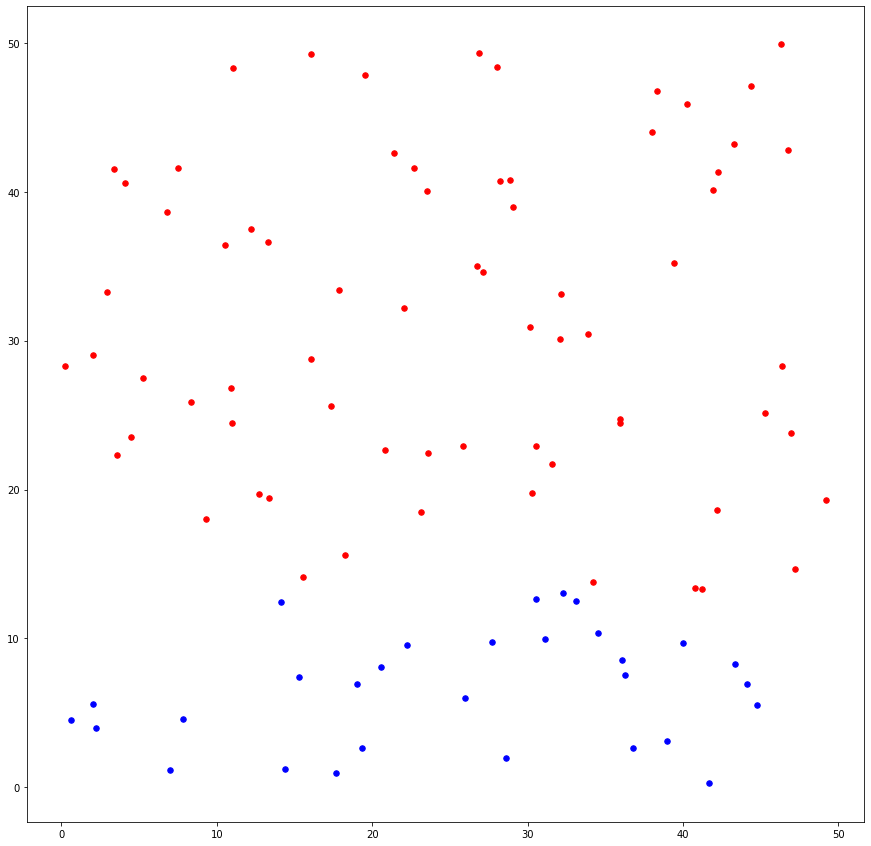

In [18]:
plt.figure(figsize=(15, 15))
dead_X = []
dead_Y = []
undead_X = []
undead_Y = []
for i in range(num_nodes):
    if i in dead:
        dead_X.append(Xs[i])
        dead_Y.append(Ys[i])
    else:
        undead_X.append(Xs[i])
        undead_Y.append(Ys[i])
plt.scatter(dead_X, dead_Y, s = 30, color = 'red')
plt.scatter(undead_X, undead_Y, s = 30, color = 'blue')

In [16]:
print(len(dead))

70
